# Your name: Kiejstut Bunikiewicz
## Assignment Name: CA05A - Logistic Regression

# Program Inititialization Section
## Enter your import packages here

In [1]:
# import packages 

import numpy as np
import pandas as pd
from sklearn import linear_model
import sklearn.metrics # this will give us the metrics to use later
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt # this package and the packages after are used for graphing
import pydotplus
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

#Mounting Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data File Reading Section / Data Source and Contents
## Write code to read in data from external sources here

In [2]:
#read datasets
cardio_data = 'https://raw.githubusercontent.com/ArinB/CA05-B-Logistic-Regression/master/cvd_data.csv' #data is read in from this URL
cardio_data = pd.read_csv(cardio_data)
cardio_data.head() # import successful

,cvd_4types,age_s1,race,educat,mstat,hip,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
0,0,54,1,2,1,110.0,40.0,108.0,87.5,34.0,0,1,0,1,2,3,4
1,0,56,3,2,1,113.0,34.0,107.0,83.5,0.0,0,0,0,2,2,1,3
2,0,54,1,3,1,110.0,44.5,105.0,86.2,49.5,0,0,0,3,2,6,4
3,0,54,1,3,1,129.0,42.5,110.0,89.1,0.0,0,0,0,3,2,1,3
4,0,51,3,2,1,122.0,37.0,113.0,81.3,0.0,0,0,0,2,1,1,2


### Column Descriptions

cvd_4types: Risk of Cardiovascular Disease 0 = No Risk, 1 Risk Present (Decision Variable)

age_s1: Age in Years

race: 1 = White, 2 = Black, 3 = Other

Educat: Education Level

Mstat: Marital Status

hip: Hip Circumference (cm)

neck20: Neck Circumference (cm)

waist: Waist Circumference (cm)

av_weight_kg: weight in kilograms

cgpkyr: Cigarette Pack-Years

tea15: Daily tea intake (cups)

srhype: Self-Reported Hypertension

parrptdiab: History of Diabetes

bend25: How much does your health limit your ability to bend?

happy25: In the past 4 weeks, how much time have you been happy?

tired25: In the past 4 weeks, how much time have you been tired?

hlthlm25: During the past 4 weeks, how much has health limited your social activities?

In [3]:
#counting values of the decision variable

cardio_data.cvd_4types.value_counts() #two outcomes, no need to bin further

1    1913
0    1329
Name: cvd_4types, dtype: int64

In [4]:
#General Data Overview
cardio_data.describe
cardio_data.info
cardio_data.dtypes # data types look correct
cardio_data.shape # correct number of rows
cardio_data.count()

# Finding Missing values / NaNs
cardio_data.isnull().sum() # No null values/ NaN in dataset
cardio_data.tail()
cardio_data.head()


,cvd_4types,age_s1,race,educat,mstat,hip,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
0,0,54,1,2,1,110.0,40.0,108.0,87.5,34.0,0,1,0,1,2,3,4
1,0,56,3,2,1,113.0,34.0,107.0,83.5,0.0,0,0,0,2,2,1,3
2,0,54,1,3,1,110.0,44.5,105.0,86.2,49.5,0,0,0,3,2,6,4
3,0,54,1,3,1,129.0,42.5,110.0,89.1,0.0,0,0,0,3,2,1,3
4,0,51,3,2,1,122.0,37.0,113.0,81.3,0.0,0,0,0,2,1,1,2


In [5]:
#No need to cleanse or transform data further

#Split data into train and test
X = cardio_data.iloc[0:,1:] #selecting the independent columns
y = cardio_data.iloc[0:,0:1] #the cvd_4types is the dependent variable
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1) #splitting data into X and y and train and test sets
X_train.info() #split successful

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2431 entries, 3169 to 1061
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age_s1        2431 non-null   int64  
 1   race          2431 non-null   int64  
 2   educat        2431 non-null   int64  
 3   mstat         2431 non-null   int64  
 4   hip           2431 non-null   float64
 5   neck20        2431 non-null   float64
 6   waist         2431 non-null   float64
 7   av_weight_kg  2431 non-null   float64
 8   cgpkyr        2431 non-null   float64
 9   tea15         2431 non-null   int64  
 10  srhype        2431 non-null   int64  
 11  parrptdiab    2431 non-null   int64  
 12  bend25        2431 non-null   int64  
 13  happy25       2431 non-null   int64  
 14  tired25       2431 non-null   int64  
 15  hlthlm25      2431 non-null   int64  
dtypes: float64(5), int64(11)
memory usage: 322.9 KB


#1. Building a Binary Classifier Model

In [6]:
#Fitting the Logistic Regression Classifier

clf = linear_model.LogisticRegression(C=1e40, solver= 'newton-cg') #Running the Logistic Regression with the specified solver hyperparameter
fitted_model = clf.fit(X_train, y_train) #training the model
pred = clf.predict(X_test) #creating a set of predictions
prediction_result = clf.predict(X_test)#predicting outcomes for the test set

print(prediction_result) #printed a sample of the predictions

[1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 0 0 1 0 1 1 1 1 0 1
 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1
 0 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 0 1 1
 1 1 1 1 1 0 0 1 1 1 0 0 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1
 1 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 0 0 1 0 0 1 1 1 0 1 0
 0 0 1 1 1 0 1 0 1 1 0 0 1 1 0 1 1 0 1 1 1 0 0 1 1 0 1 0 1 0 1 1 1 0 1 0 1
 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0
 1 1 1 1 1 1 0 0 0 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 0
 1 0 0 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 0 0 0 0 1 1 0 0 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1
 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1
 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1
 0 0 1 1 1 1 1 0 1 0 0 0 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [7]:
clf.score(X_test, y_test) #preliminary model score before full evaluation

0.6979038224414303

In [8]:
clf.predict_proba(X_test) #sample prediction probabilities for each result (0 or 1) in the X_test set

array([[0.42297445, 0.57702555],
       [0.46866769, 0.53133231],
       [0.44937503, 0.55062497],
       ...,
       [0.65590904, 0.34409096],
       [0.44528429, 0.55471571],
       [0.3411404 , 0.6588596 ]])

# 2. Display Feature Importance of All Features in Order of Decreasing Influence

In [9]:
#determine feature importance of model features
from sklearn.linear_model import LogisticRegression

clf.fit(X_train/ np.std(X_train, 0), y_train) #fitting model to create standardized coefficient scores by dividing the coefficient by standard deviation
model_coef = clf.coef_
abs_coef = abs(model_coef) #getting absolute values of feature coefficients

coef_results = pd.DataFrame(abs_coef, columns=X_train.columns, index=['coefficient']) #Creating dataframe of absolute value of coefficient results
coef_results = coef_results.transpose() #transposing to correct format
coef_sorted = coef_results.coefficient.sort_values(ascending=False) #sorting values
print(coef_sorted) #printed df of absolute values of the coefficients

#Three most important factors: Waist Circumference (cm), Hip Circumference (cm), and Health Limit on Social Activities
  #With a higher level on these 3, a higher increase on risk of Cardiovascular Disease
#Three least important facotrs: age at beginning of test, Tea Consumption (cups per day), and Cigarrette Packs per year

waist           1.088542
hip             0.571325
hlthlm25        0.359510
race            0.328228
av_weight_kg    0.277711
educat          0.181624
neck20          0.144224
parrptdiab      0.140400
mstat           0.131617
srhype          0.097887
happy25         0.095933
tired25         0.082752
bend25          0.067397
cgpkyr          0.043158
tea15           0.041783
age_s1          0.011518
Name: coefficient, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# 3. Evaluation of Model Performance

Accuracy Score: 0.5960510078157137
confusion matrix:
[[148 170]
 [ 75 418]]
F1 Score:  0.7733580018501388
ROC Score: 0.6566394937936137


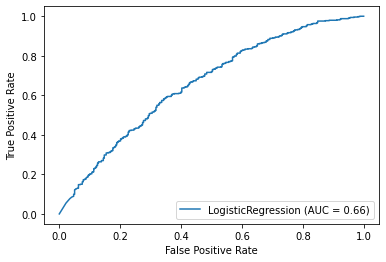

In [10]:
#Running Different MEtrics
#Accuracy Score
accuracy_score = clf.score(X_train, y_train)
print('Accuracy Score:', accuracy_score) #score is 0.59, which is verging on being useful, but not fully descriptive of model performance

#Confusion Matrix
cmatrix = confusion_matrix(y_test, pred)
print('confusion matrix:')
print(cmatrix) #Results show the model is more likely to opt for false positives (170) rather than false negatives (75) which suits business goals
  # for medical results, it is better to set off a false alarm rather than not diagnose a potential case, this may account for some inaccuracy in the set

#F1 Score
f1 = f1_score(y_test, pred)
print("F1 Score: ", f1) #the F1 score is 0.77, which is good because it shows a decent balance between positive predictions and negative predictions

#ROC Score
roc = roc_auc_score(y_test, pred)
print("ROC Score:", roc) #the ROC curve of 0.66, also shown on the plot of the ROC curve shows the model performs better than random guess by 16%
#this means the model is relatively useful for predicting likelihood of risk

#ROC Curve
plot_roc_curve(clf, X_test, y_test)
plt.show() #print out of ROC curve

#Full results commentary in word document